In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
avacadodata = pd.read_csv('/Users/manueltanguma/Downloads/avocado.csv', encoding='latin-1')

In [3]:
avacadodata.shape

(18249, 14)

In [4]:
avacadodata.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avacadodata.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
avacadodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


[Text(0,0,'Unnamed: 0'),
 Text(0,0,'AveragePrice'),
 Text(0,0,'Total Volume'),
 Text(0,0,'4046'),
 Text(0,0,'4225'),
 Text(0,0,'4770'),
 Text(0,0,'Total Bags'),
 Text(0,0,'Small Bags'),
 Text(0,0,'Large Bags'),
 Text(0,0,'XLarge Bags'),
 Text(0,0,'year')]

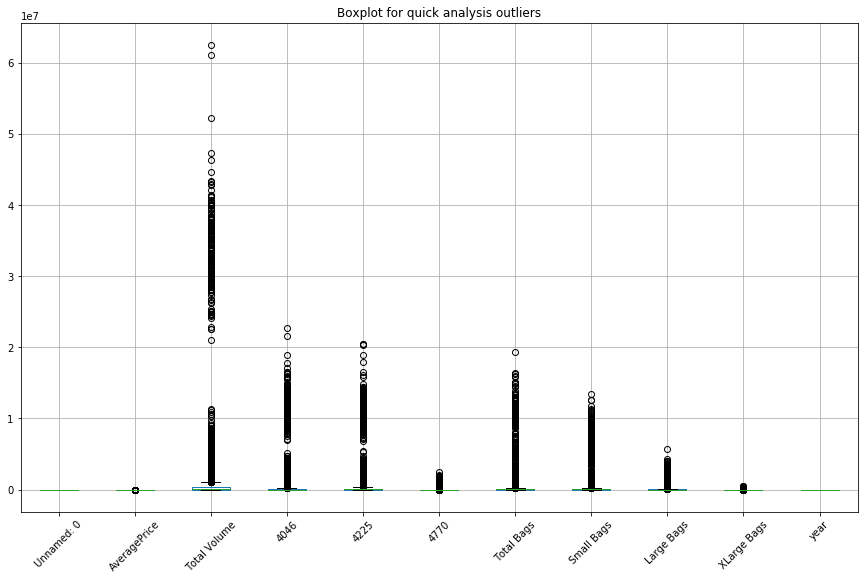

In [7]:
#Quick and dirty look at the data to check for outliers
plt.figure(figsize=(15,9))
ax = avacadodata.boxplot()
ax.set_title('Boxplot for quick analysis outliers')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### Choose one variable and plot 4 different ways

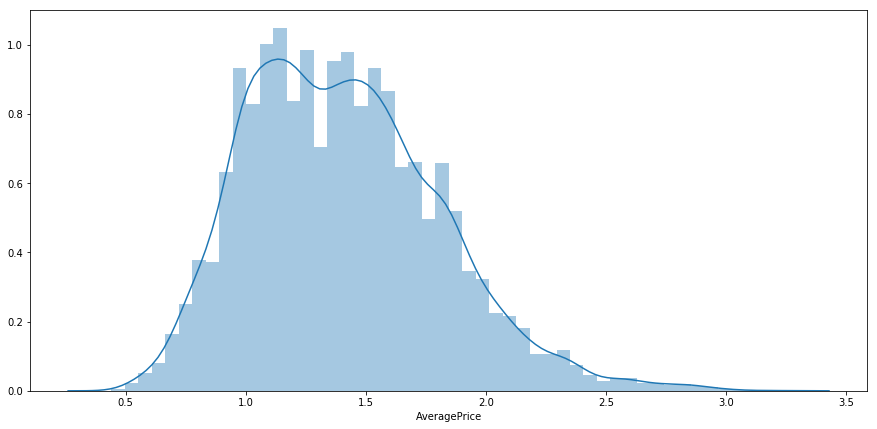

In [8]:
#1
plt.figure(figsize=(15,7))
sns.distplot(avacadodata['AveragePrice'])

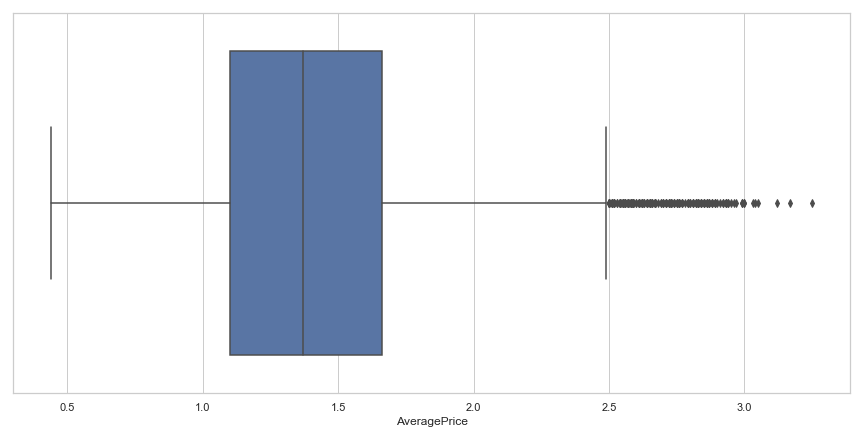

In [9]:
#2
import seaborn as sns
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.boxplot(avacadodata["AveragePrice"])

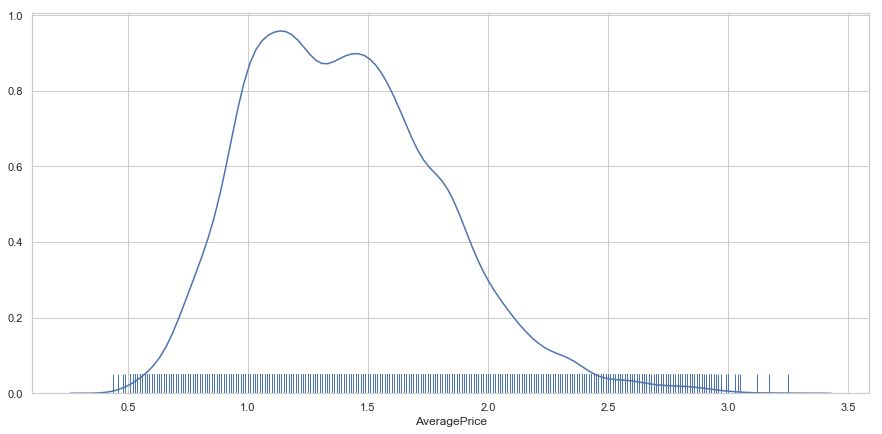

In [10]:
#3
plt.figure(figsize=(15,7))
sns.distplot(avacadodata["AveragePrice"], hist=False, rug=True);

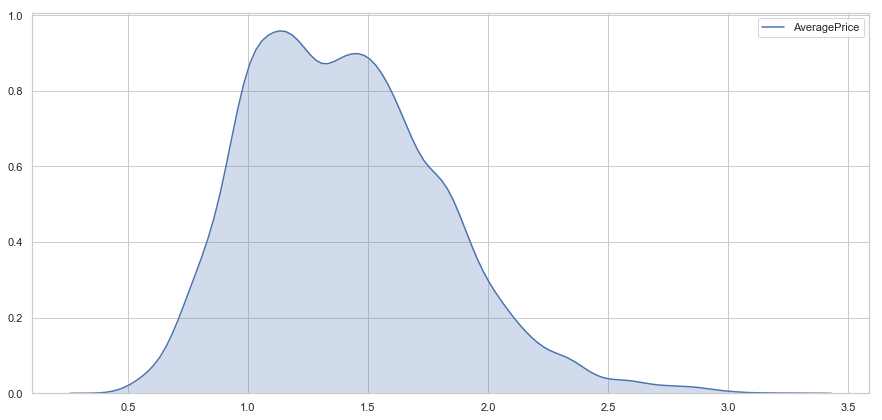

In [11]:
#4
plt.figure(figsize=(15,7))
sns.kdeplot(avacadodata["AveragePrice"], shade=True);

### Choose two continuous variables, and plot them three different ways.

<Figure size 1080x504 with 0 Axes>

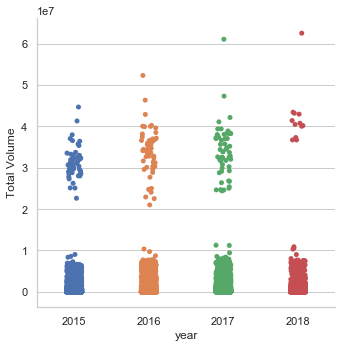

In [12]:
#1
plt.figure(figsize=(15,7))
sns.catplot(x="year", y="Total Volume", data=avacadodata)

<Figure size 1080x504 with 0 Axes>

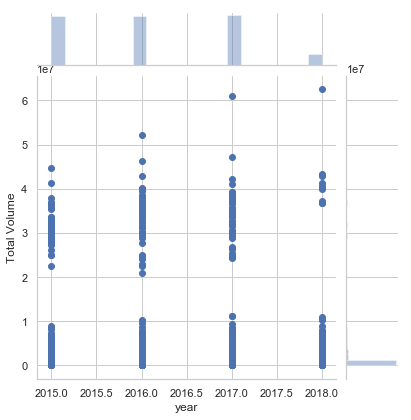

In [13]:
#2
plt.figure(figsize=(15,7))
sns.jointplot(x="year", y="Total Volume", data=avacadodata)

<Figure size 1080x504 with 0 Axes>

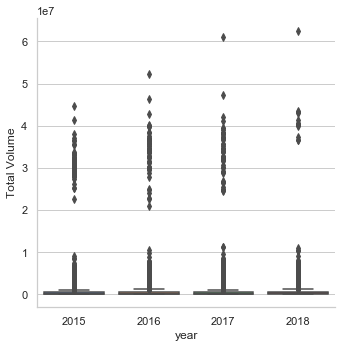

In [14]:
#3
plt.figure(figsize=(15,7))
sns.catplot(x="year", y="Total Volume", kind="box", data=avacadodata)

In [15]:
avacadodata['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

### Choose one continuous variable and one categorical variable, and plot them six different ways.


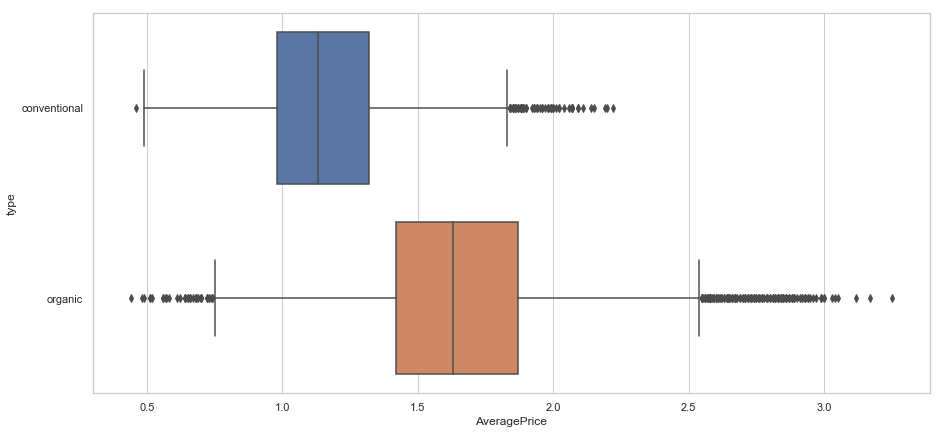

In [16]:
#1
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.boxplot(x=avacadodata["AveragePrice"], y=avacadodata["type"])

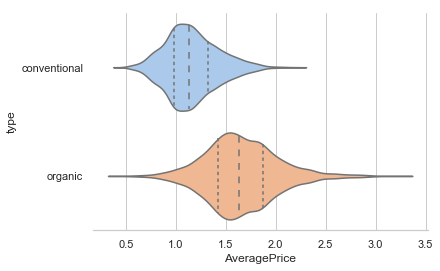

In [17]:
#2
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot
sns.violinplot(x="AveragePrice", y='type',
               split=True, inner="quartile", scale='count',
               data=avacadodata)
sns.despine(left=True)

(-0.5, 1.5)

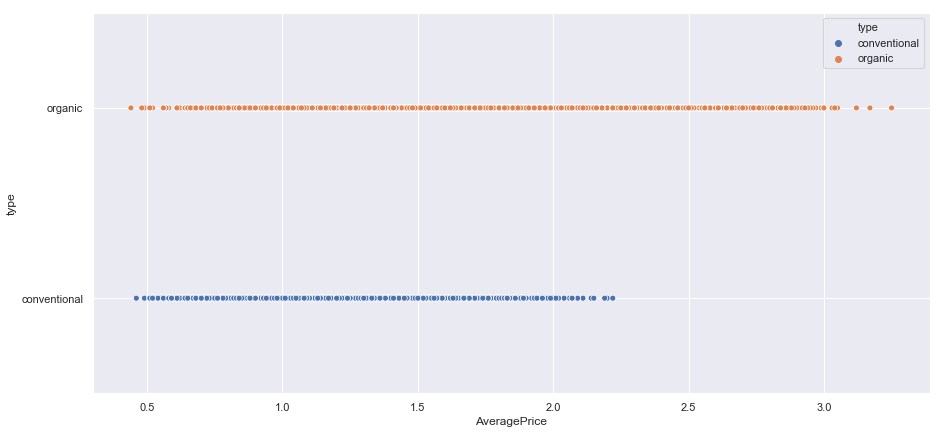

In [18]:
#3
sns.set()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=False)
plt.figure(figsize=(15,7))
ax = sns.scatterplot(x="AveragePrice", y="type",
                     hue="type", 
                     data=avacadodata)
ax.set_ylim([-0.5, 1.5])

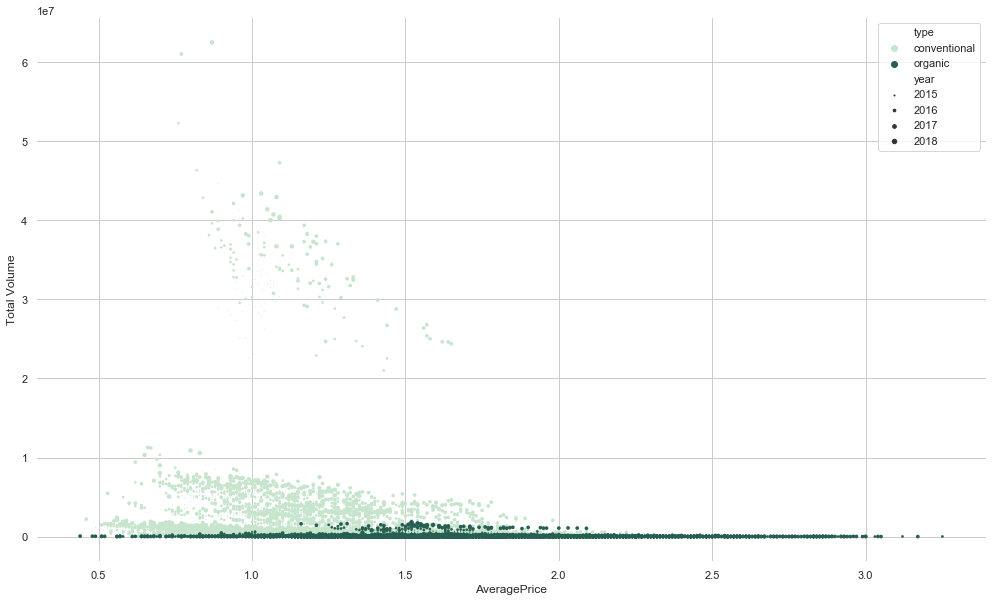

In [19]:
#4
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(17, 10))
sns.despine(f, left=True, bottom=True)
type_ranking = ["conventional", "organic"]
sns.scatterplot(x="AveragePrice", y="Total Volume",
                hue="type", size="year",
                palette="ch:2.5,-.2,dark=.3",
                hue_order=type_ranking,
                sizes=(1, 20), linewidth=0,
                data=avacadodata, ax=ax)

In [20]:
avacadodata['region'].value_counts()

West                   338
DallasFtWorth          338
Northeast              338
Louisville             338
Midsouth               338
LasVegas               338
Portland               338
Jacksonville           338
Boston                 338
PhoenixTucson          338
StLouis                338
SouthCentral           338
HarrisburgScranton     338
Plains                 338
Detroit                338
SanDiego               338
Spokane                338
SouthCarolina          338
TotalUS                338
Denver                 338
NorthernNewEngland     338
Boise                  338
Nashville              338
Southeast              338
California             338
Syracuse               338
RichmondNorfolk        338
Indianapolis           338
GreatLakes             338
Albany                 338
Chicago                338
LosAngeles             338
BuffaloRochester       338
Seattle                338
Columbus               338
MiamiFtLauderdale      338
BaltimoreWashington    338
S

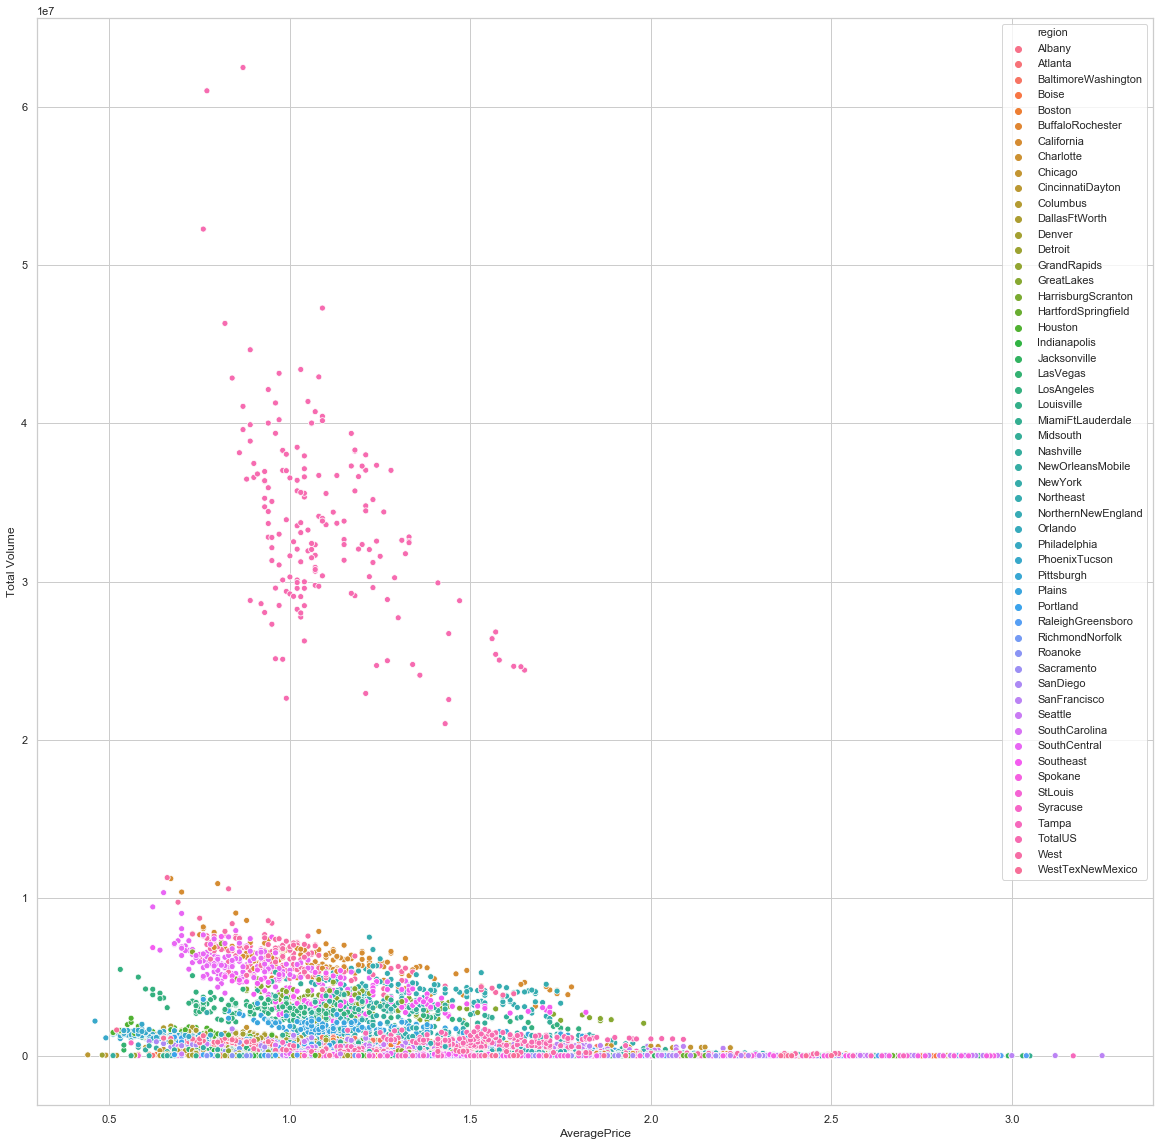

In [21]:
#5
plt.figure(figsize=(20,20))
ax = sns.scatterplot(x="AveragePrice", y="Total Volume", hue="region",
                     data=avacadodata)

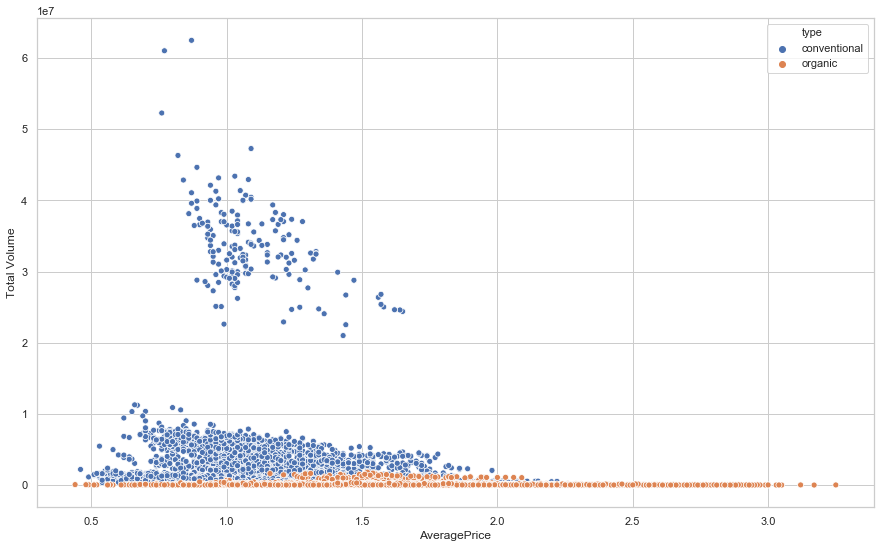

In [22]:
#6
plt.figure(figsize=(15,9))
ax = sns.scatterplot(x="AveragePrice", y="Total Volume", hue="type",
                     data=avacadodata)

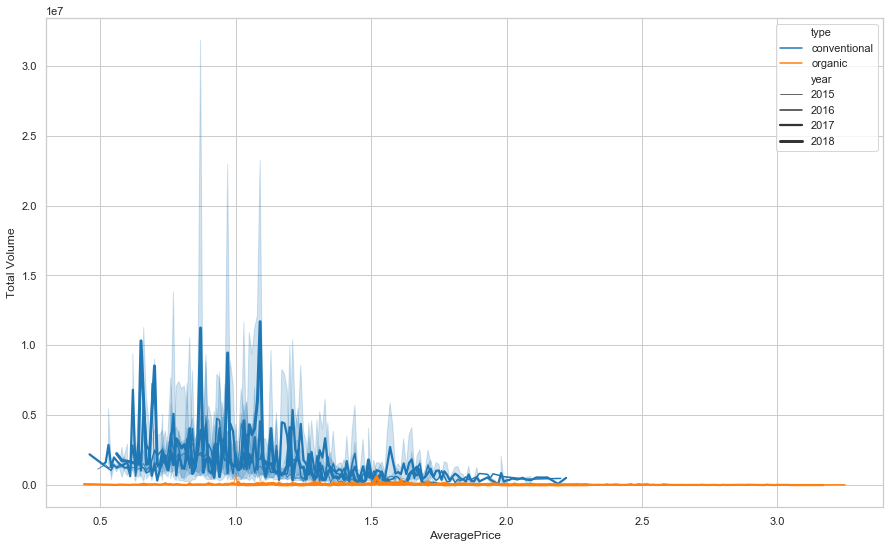

In [23]:
#7
sns.set(style="whitegrid")
plt.figure(figsize=(15,9))

avacadodata2 = avacadodata[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type','year']]

sns.lineplot(x='AveragePrice', y='Total Volume', size='year', hue='type', data=avacadodata2, palette="tab10", linewidth=2.5)

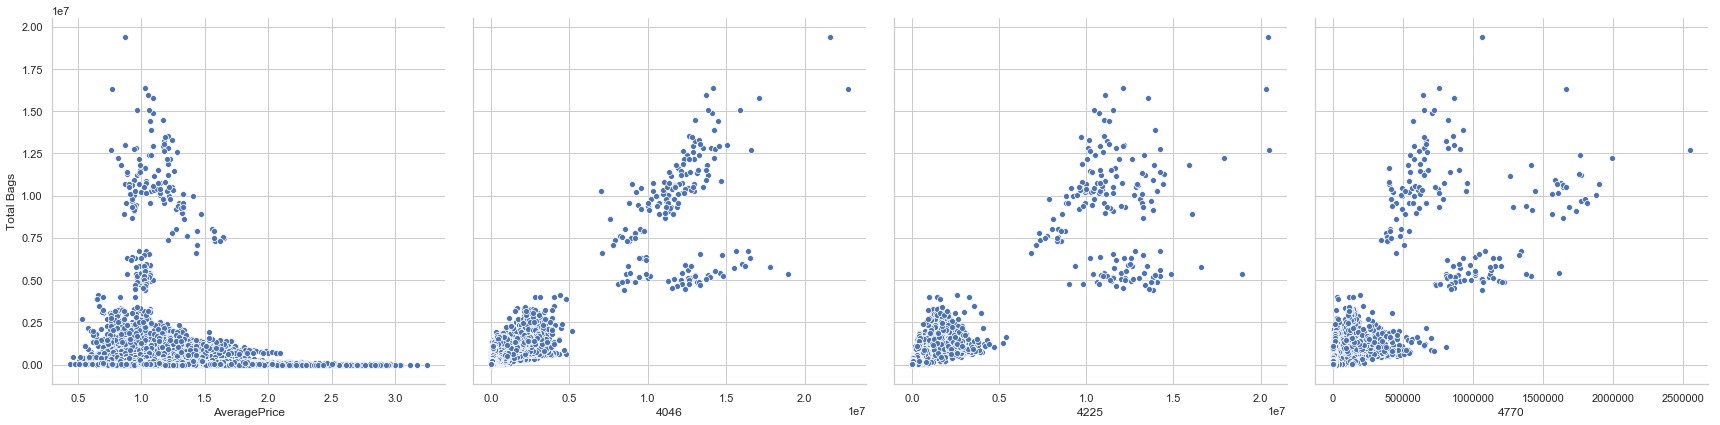

In [24]:
#8
pp = sns.pairplot(data=avacadodata,
                  y_vars=['Total Bags'],
                  x_vars=['AveragePrice','4046', '4225', '4770'],
                 height=6)
